In [40]:
import numpy as np
import scipy.fftpack as sp
from scipy.fft import dct, idct
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import dcst

# Questão 1
## a)
Escreva um programa que carregue uma forma de onda de um desses arquivos, faça
um gráfico dela, depois calcule sua transformada discreta de Fourier e represente
graficamente as magnitudes dos primeiros 10.000 coeficientes. Observe que você terá
que usar uma transformação rápida de Fourier (FFT) para o cálculo porque há muitas
amostras nos arquivos para fazer as transformações de maneira lenta em qualquer
período de tempo razoável. \
Aplique seu programa às formas de onda do piano e do trompete.

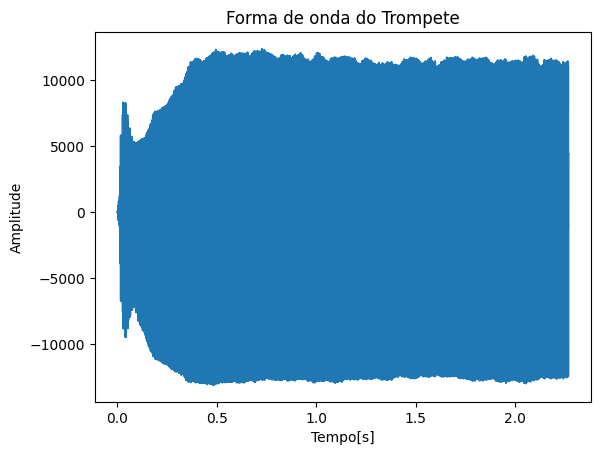

In [41]:
# Forma de onda do Trompete

plt.title('Forma de onda do Trompete')
t = np.loadtxt("trumpet.txt")
segundos = np.arange(0, len(t)) / 44100
plt.xlabel('Tempo[s]')
plt.ylabel('Amplitude')
plt.plot(segundos, t)

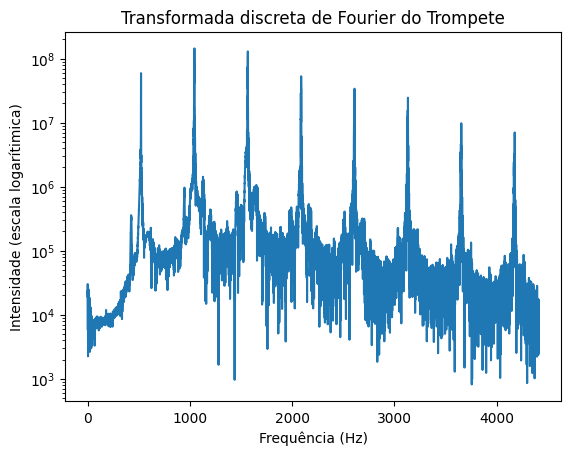

In [42]:
# Transformada discreta de Fourier dos primeiros 10.000 coeficientes do Trompete

plt.title('Transformada discreta de Fourier do Trompete')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Intensidade (escala logarítimica)')
plt.yscale('log')
# Aplicando a transformação rápida de Fourier (FFT)
fftt = np.fft.rfft(t)
freqt = np.fft.rfftfreq(len(t),d=1./44100)
plt.plot(freqt[:10000], np.abs(fftt)[:10000])

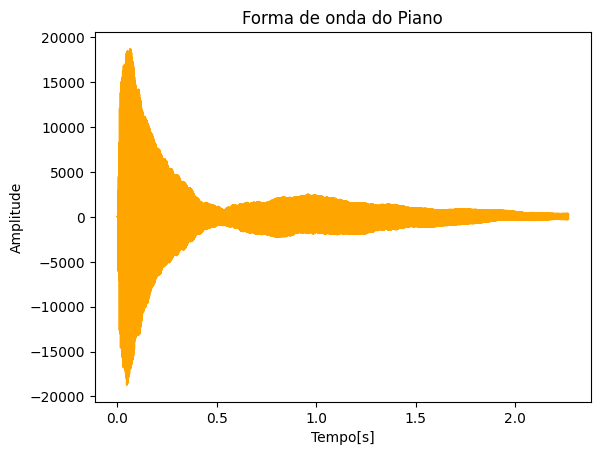

In [43]:
# Forma de onda do Trompete

plt.title('Forma de onda do Piano')
p = np.loadtxt("piano.txt")
segundos = np.arange(0, len(p)) / 44100
plt.xlabel('Tempo[s]')
plt.ylabel('Amplitude')
plt.plot(segundos, p, color = 'orange')

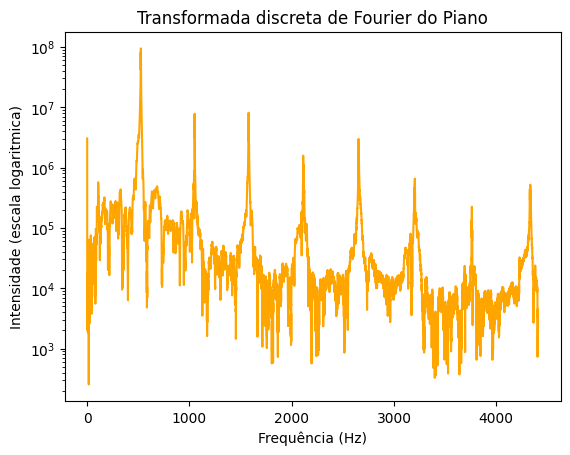

In [44]:
# Transformada discreta de Fourier dos primeiros 10.000 coeficientes do Piano

plt.title('Transformada discreta de Fourier do Piano')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Intensidade (escala logaritmica)')
plt.yscale('log')
# Aplicando a transformação rápida de Fourier (FFT) no espaço das frequências
fftp = np.fft.rfft(p)
freqp = np.fft.rfftfreq(len(p),d=1./44100)
plt.plot(freqp[:10000], np.abs(fftp)[:10000], color = 'orange')

**Questão**: discuta brevemente o que se pode concluir sobre o som do piano e do trompete a partir dos gráficos dos coeficientes de Fourier.


**Resposta:** É possível observar que as duas formas de onda apresentam periodicidade, com picos bem definidos para as mesmas frequências.

# b)
Ambas as formas de onda foram gravadas à taxa padrão da indústria de 44.100
amostras por segundo e ambos os instrumentos tocavam a mesma nota musical quando
as gravações foram feitas. A partir dos resultados da transformada de Fourier, calcule a
nota que eles estavam tocando. (Dica: a nota musical dó central tem uma frequência de
261 Hz).

In [45]:
# Ajustando as frequências à taxa padrão

freqt = np.fft.rfftfreq(len(t),d=1./44100)
freqp = np.fft.rfftfreq(len(p),d=1./44100)

In [ ]:
# Encontrando o índice do valor máximo da Intensidade

print('Posição do coeficiente de maior magnitude (Trompete):', np.argmax(np.abs(fftt)))
print('Posição do coeficiente de maior magnitude (Piano):', np.argmax(np.abs(fftp)))

Posição do coeficiente de maior magnitude (Trompete): 2367
Posição do coeficiente de maior magnitude (Piano): 1190


In [46]:
# Encontrando as frequências associadas ao valor máximo
print('Frequência dominante (Trompete)', freqt[2367])
print('Frequência dominante (Piano)', freqp[1190])

Frequência dominante (Trompete) 1043.847
Frequência dominante (Piano) 524.79


Sabendo que a nota dó central (quarta oitava de dó) tem uma frequência de 261 Hz e todas as oitavas seguintes são representadas como múltiplos inteiros dessa frequência, concluímos que ambos os instrumentos tocavam essa nota. Podemos aproximar os resultados obtidos como: \
Piano (524,79 Hz) - Quinta oitava de dó \
Trompete (1043,85 Hz) - Sexta oitava de dó

# Questão 2
## a)
Leia os dados de dow.txt e coloque-os em um gráfico.

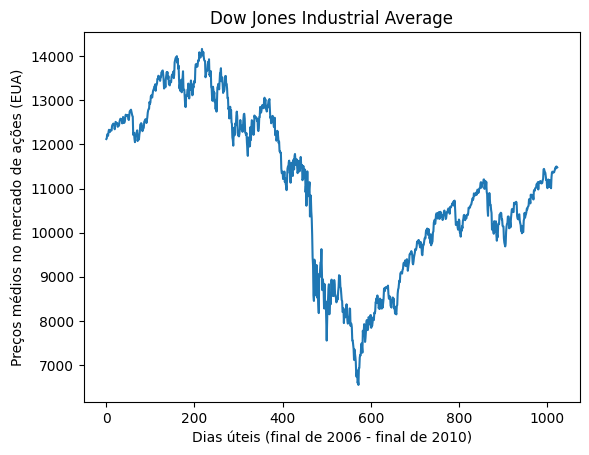

In [52]:
dow = np.loadtxt("dow.txt")
plt.title("Dow Jones Industrial Average")
plt.xlabel("Dias úteis (final de 2006 - final de 2010)")
plt.ylabel("Preços médios no mercado de ações (EUA)")
plt.plot(dow)

## b)
Calcule os coeficientes da transformada discreta de Fourier dos dados usando a
função rfft de numpy.fft, que produz uma matriz de N/2 + 1 números complexos.

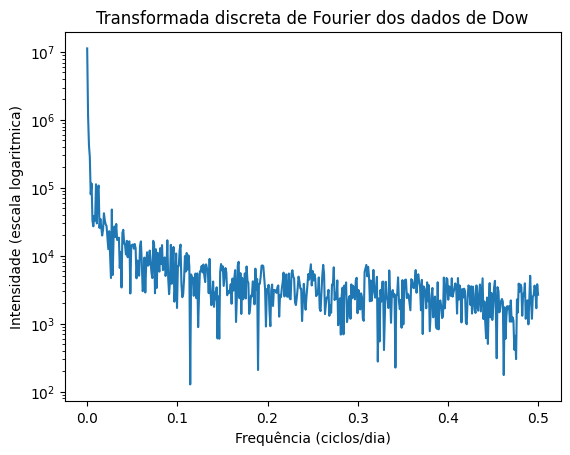

In [53]:
# Aplicando a transformada discreta de Fourier
fftdow = np.fft.rfft(dow)
freqdow = np.fft.rfftfreq(len(dow), d = 1) # passo temporal de 1 dia
plt.title('Transformada discreta de Fourier dos dados de Dow')
plt.xlabel('Frequência (ciclos/dia)')
plt.ylabel('Intensidade (escala logaritmica)')
plt.yscale('log')
plt.plot(freqdow, np.abs(fftdow))

In [54]:
# Conferindo se FFTDOW retorna um matriz de N/2 + 1 números complexos.

N = len(dow)
print(N/2 + 1)
print(len(fftdow))

513.0
513


##  c)
Agora defina todos os elementos desta matriz, exceto os primeiros 10%, como zero (ou seja, defina os últimos 90% como zero, mas mantenha os valores dos primeiros
10%).

In [55]:
# 10% de todos os elementos dos dados (FFT):
print(len(fftdow)*0.1)

51.300000000000004


In [68]:
# Matriz resultante 10% dos dados (FFT)

matriz_dowR10 = np.copy(fftdow)
matriz_dowR10[52:] = 0

## d)
Calcule a transformada inversa de Fourier da matriz resultante, com zeros e tudo,
usando a função irfft, e plote-a no mesmo gráfico dos dados originais. Pode ser
necessário variar as cores das duas curvas para garantir que ambas apareçam no gráfico.
Comente o que você vê. O que acontece quando você define os coeficientes de Fourier
como zero?

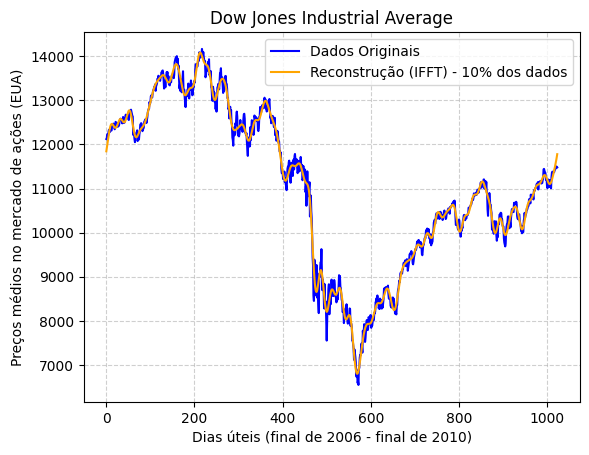

In [57]:
#Dados Originais
dow = np.loadtxt("dow.txt")
plt.title("Dow Jones Industrial Average")
plt.plot(dow, color = 'blue', label='Dados Originais')

#Aplicando a Transformada inversa de Fourier
ifftdow = np.fft.irfft(matriz_dowR10)
plt.xlabel("Dias úteis (final de 2006 - final de 2010)")
plt.ylabel("Preços médios no mercado de ações (EUA)")
plt.plot(ifftdow, color = 'orange', label='Reconstrução (IFFT) - 10% dos dados')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Discussão:** O sinal reconstruído com np.fft.irfft de 10% do sinal corresponde muito bem ao comportamento do sinal original, porém ficou mais suave e perdeu detalhes de alta frequência.

Apenas os primeiros 10% dos coeficientes (baixas frequências) que são preservados, contêm a informação estrutural do sinal (tendências, componentes principais). \
Os últimos 90% (altas frequências) geralmente correspondem a ruído, variações rápidas ou detalhes finos.

## e)
Modifique seu programa para que ele defina todos os coeficientes, exceto os
primeiros 2%, como zero e execute o cálculo novamente. Faça um gráfico que mostre
todas as três curvas nos mesmos eixos – os dados brutos, a curva de 10% e a curva de
2%.

In [58]:
# 2% de todos os elementos dos dados (FFT):
print(len(fftdow)*0.02)

10.26


In [69]:
# Matriz resultante 2% dos dados
matriz_dowR2 = np.copy(fftdow)
matriz_dowR2[11:] = 0

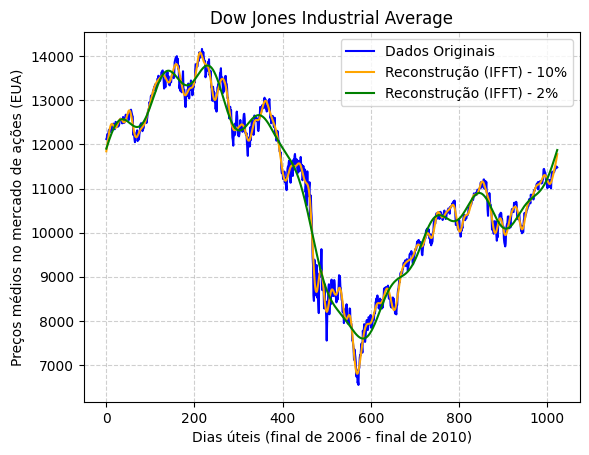

In [61]:
plt.title("Dow Jones Industrial Average")
plt.xlabel("Dias úteis (final de 2006 - final de 2010)")
plt.ylabel("Preços médios no mercado de ações (EUA)")

#Dados brutos
plt.plot(dow, color = 'blue', label='Dados Originais')

#Curva de 10%
ifftdowR10 = np.fft.irfft(matriz_dowR10)
plt.plot(ifftdowR10, color = 'orange', label='Reconstrução (IFFT) - 10%')

#Curva de 2%
ifftdowR2 = np.fft.irfft(matriz_dowR2)
plt.plot(ifftdowR2, color = 'green', label='Reconstrução (IFFT) - 2%')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## f)
Modifique seu programa para ler os dados de dow2.txt e realizar a análise de Fourier
novamente, traçando apenas duas curvas desta vez, para os dados brutos e a versão
“2%”. Você deverá ver que agora existe um artefato adicional na curva de 2%. No início
e no final do gráfico você deverá ver grandes desvios da verdadeira função. Isso ocorre
porque a função deve ser periódica – seu último valor deve ser igual ao primeiro -
portanto, ele precisa desviar-se substancialmente do valor correto para fazer com que
as duas extremidades da função se encontrem. Em algumas situações (incluindo esta)
este comportamento é insatisfatório. Preferiríamos não introduzir artefatos deste tipo.

In [62]:
# 2% de todos os elementos dos dados (FFT):
dow2 = np.loadtxt("dow2.txt")
fftdow2 = np.fft.rfft(dow2)

print(len(np.fft.rfft(dow2))*0.02)

10.26


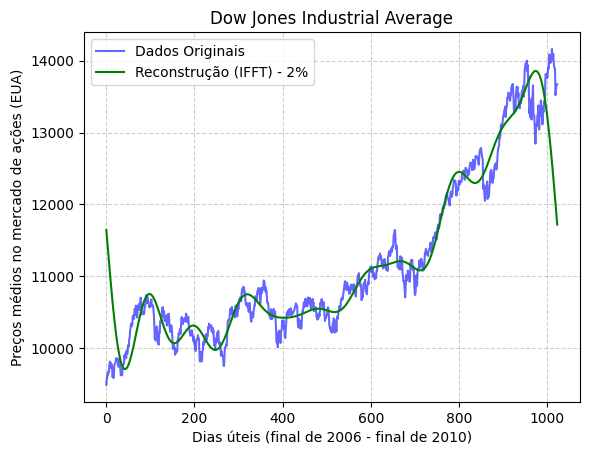

In [63]:
#Dados Originais
dow2 = np.loadtxt("dow2.txt")
plt.title("Dow Jones Industrial Average")
plt.xlabel("Dias úteis (final de 2006 - final de 2010)")
plt.ylabel("Preços médios no mercado de ações (EUA)")

plt.plot(dow2, color = 'blue', alpha = 0.6, label='Dados Originais')

#Matriz Resultante 2% dos dados (FFT):
matriz_dow2 = np.copy(fftdow2)
matriz_dow2[11:] = 0

#Aplicando a Transformada inversa de Fourier
ifftdow2 = np.fft.irfft(matriz_dow2)
plt.plot(ifftdow2, color = 'green', label='Reconstrução (IFFT) - 2%')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## g)
Modifique seu programa para repetir a mesma análise usando uma transformada
discreta de cosseno. Transforme os dados e descarte novamente todos os coeficientes,
exceto os primeiros 2%, depois inverta a transformação e represente graficamente o
resultado. Você deverá ver uma melhoria significativa, com menos distorção da função
nos finais do intervalo. Isso ocorre porque a transformada de cosseno não força o valor
da função a ser o mesmo nas duas extremidades. Dica: A função dct faz a transformação
do cosseno e idct faz a transformação inversa.


In [64]:
dow2 = np.loadtxt("dow2.txt")

# Aplicando a transformada discreta de cosseno (DCT)
dctdow2 = dct(dow2, norm='ortho')

In [65]:
# 2% de todos os elementos dos dados (DCT):
print(len(dctdow2)*0.02)

# 10% de todos os elementos dos dados (DCT):
print(len(dctdow2)*0.1)


20.48
102.4


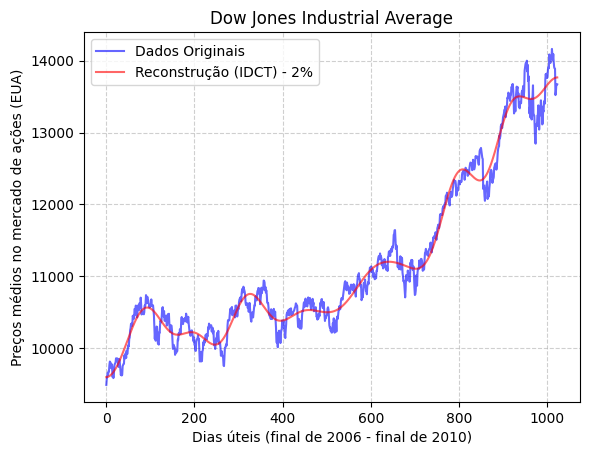

In [66]:
plt.title("Dow Jones Industrial Average")
plt.xlabel("Dias úteis (final de 2006 - final de 2010)")
plt.ylabel("Preços médios no mercado de ações (EUA)")

#Dados Originais
plt.plot(dow2, color = 'blue', alpha = 0.6, label='Dados Originais')

#Matriz resultante 2% dos dados
matriz_dctdow2 = np.copy(dctdow2)
matriz_dctdow2[21:] = 0

#Aplicando a transformada inversa de cosseno
idctdow2 = idct(matriz_dctdow2, norm='ortho')
plt.plot(idctdow2, color = 'red', alpha =0.6, label='Reconstrução (IDCT) - 2%')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Entregue também seus dois gráficos
das partes (f) e (g) mostrando sua análise do segundo conjunto de dados usando a DFT
e a DCT respectivamente (ou você pode combinar (f) e (g) em um único gráfico, se
preferir) .

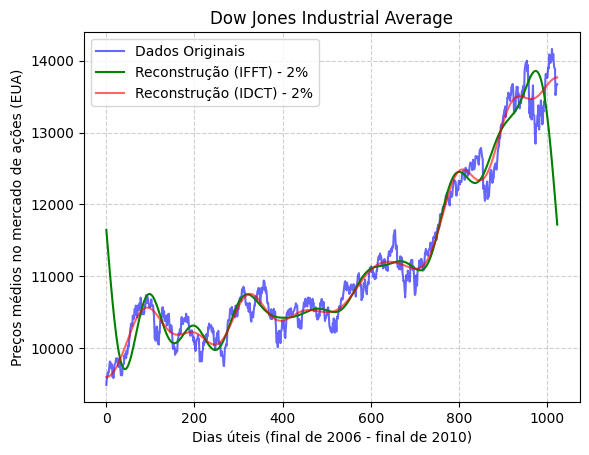

In [67]:
plt.title("Dow Jones Industrial Average")
plt.xlabel("Dias úteis (final de 2006 - final de 2010)")
plt.ylabel("Preços médios no mercado de ações (EUA)")

#Dados Originais
plt.plot(dow2, color = 'blue', alpha = 0.6, label='Dados Originais')

#Matriz resultante 2% (FFT)
matriz_dow2 = np.copy(fftdow2)
matriz_dow2[11:] = 0

# Inversa FFT
ifftdow2 = np.fft.irfft(matriz_dow2)
plt.plot(ifftdow2, color = 'green', label='Reconstrução (IFFT) - 2%')

#Matriz resultante 2% (DCT)
matriz_dctdow2 = np.copy(dctdow2)
matriz_dctdow2[21:] = 0

# Inversa DCT
idctdow2 = idct(matriz_dctdow2, norm='ortho')
plt.plot(idctdow2, color = 'red', alpha =0.6, label='Reconstrução (IDCT) - 2%')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3 Compressão de imagem
## a)
Escreva um programa Python que leia os dados do arquivo em um array
bidimensional e então faça um gráfico de densidade do array, mostrando a imagem na tela

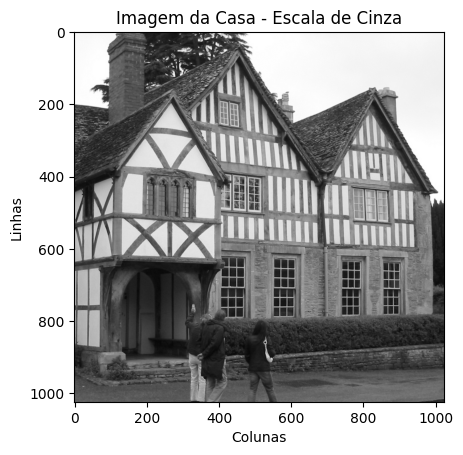

In [4]:
house = np.loadtxt("house.txt")

plt.title("Imagem da Casa - Escala de Cinza")
plt.xlabel("Colunas")
plt.ylabel("Linhas")
plt.imshow(house, cmap='gray')

## b)
Agora crie outro array bidimensional do mesmo tamanho do array de imagens e
inicialmente vazio. Percorra a matriz de imagens em blocos de 16 × 16 e execute uma
transformação discreta de cosseno 2D dos dados em cada bloco, produzindo uma matriz
16 × 16 de coeficientes de Fourier (reais) e, em seguida, armazene esses coeficientes no
bloco correspondente da nova matriz. Você pode realizar os DCTs usando a função dct2
do arquivo dcst.py. Para obter os blocos 16 × 16, você precisará fazer um “fatiamento”
bidimensional nas matrizes. Ao terminar todos os blocos, você terá um novo array do
mesmo tamanho do antigo, totalmente cheio de coeficientes de Fourier.

In [28]:
MatrizCoef = np.zeros_like(house)

for i in range(0, house.shape[0], 16):
    for j in range(0, house.shape[1], 16):
        b = house[i:i+16, j:j+16]
        Blocos = dcst.dct2(b)
        MatrizCoef[i:i+16, j:j+16] = Blocos


print("Matriz de coeficientes DCT:")
print(MatrizCoef)

Matriz de coeficientes DCT:
[[ 2.53792000e+05  6.66294810e+01 -4.67393713e+01 ... -7.61424262e+00
  -8.99908955e+00  1.75827628e+00]
 [-3.40885567e+02 -6.44216034e+01 -2.29202141e+01 ...  1.17715905e+00
  -6.26345453e+00  1.10614204e+01]
 [ 4.26290771e+01  2.32701748e+01  1.63842478e+01 ...  3.05773993e+00
   1.67036961e-01 -2.27105710e+01]
 ...
 [-1.56421363e+01 -2.82230788e+01  4.76363291e+01 ... -2.21374086e+01
  -6.65664849e+00  3.07590774e+01]
 [ 1.08304437e+01 -1.88724711e+01  1.43739086e+00 ... -2.85874884e+01
  -1.02492088e+01  1.78066814e+01]
 [-1.36310215e+01  3.02268950e+01 -1.73407031e+01 ... -3.98064019e+01
  -7.25028527e+00  2.09833860e+01]]


## c)
Agora analise os coeficientes de Fourier um por um e defina como zero todos os
coeficientes cujo valor absoluto seja menor que 10. Em outras palavras, todos os
coeficientes no intervalo de -10 a +10 devem ser definidos como zero

In [29]:
MatrizZero = MatrizCoef.copy()
zeros = np.abs(MatrizCoef) < 10
MatrizZero[zeros] = 0

contador = np.count_nonzero(MatrizZero)
total = MatrizZero.size

CoefZeros =  total - contador
porcentagem = (contador / total) * 100

## d)
Quando enviamos uma imagem pela Internet, transmitimos os coeficientes de
Fourier, não a imagem em si, e só precisamos transmitir os coeficientes que são
diferentes de zero. Conte quantos coeficientes foram definidos como zero em seu
cálculo e use isso para calcular e imprimir um valor de quanto você comprimiu a imagem
- quão menor é o conjunto de números que você teria que enviar pela Internet do que
o conjunto original de o arquivo house.txt? Este valor é chamado de taxa de
compressão.

In [30]:
print(f"Número de coeficientes nulos: {CoefZeros}")
print(f"Total de elementos nulos: {total}")
print(f"Porcentagem de elementos não nulos: {porcentagem:.2f}%")
print(f"Taxa de compressão: {100/porcentagem:.2f}:1")

Número de coeficientes nulos: 279492
Total de elementos nulos: 1048576
Porcentagem de elementos não nulos: 73.35%
Taxa de compressão: 1.36:1


**Resposta:**  
Uma taxa de compressão de 1.36:1 significa que para cada 1.36 unidades de dados no arquivo original, o arquivo comprimido ocupa 1 unidade de dados. \
O arquivo comprimido tem cerca de 73.35% do tamanho do original, assim, é enviado 26.65% menos dados pela Internet em comparação com o arquivo original. \
\
Tamanho do arquivo original: 3.54 MB \
Tamanho do arquivo compactado: (3.54 MB / 1.36) = 2.60 MB

## e)
Quando os coeficientes de Fourier são recebidos na outra extremidade, o receptor
realiza uma transformada inversa para recuperar a imagem. Embora não estejamos
realmente transmitindo a nossa imagem neste caso, ainda podemos realizar esta
segunda parte do cálculo para ver o que obteríamos. Adicione linhas ao seu programa
para percorrer mais uma vez a matriz de coeficientes de Fourier em blocos de 16 × 16 e
realizar uma DCT 2D inversa em cada um deles, armazenando os resultados novamente
na matriz de dados original (ou em uma terceira, nova matriz, se você prefere). Esta é a
“descompressão” da imagem. Você pode usar a função idct2 para os DCTs inversos.


In [31]:
imagem = np.zeros_like(MatrizZero, dtype=np.float64)


for i in range(0, imagem.shape[0], 16):
    for j in range(0, imagem.shape[1], 16):
        Blocos = MatrizZero[i:i+16, j:j+16]
        imagem[i:i+16, j:j+16] = dcst.idct2(Blocos)

## f)

Faça um gráfico de densidade da imagem descompactada. Você deve descobrir que
ela é essencialmente indistinguível da imagem original, embora a imagem tenha sido
bastante comprimida – um número significativo de coeficientes de Fourier foi
descartado ao defini-los como zero.

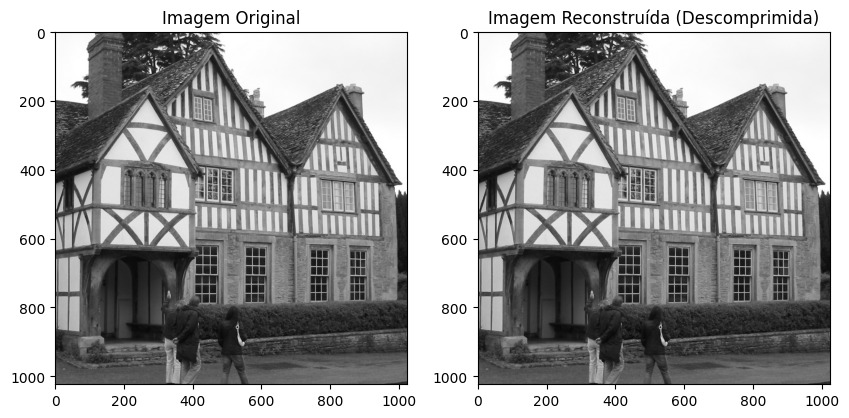

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

#imagem original
ax1.imshow(house, cmap='gray')
ax1.set_title('Imagem Original')

#imagem reconstruida
ax2.imshow(imagem, cmap='gray')
ax2.set_title('Imagem Reconstruída (Descomprimida)')

plt.show()

## g)
 Aumente o valor limite abaixo do qual os coeficientes são definidos como zero. Em
vez de 10, tente 20, ou 50, ou 100 ou mais. Veja quão grande é a taxa de compressão
que você pode atingir e ainda assim a imagem terá praticamente a mesma aparência.
Novamente, entregue o seu programa final e as imagens “antes” e “depois” que ele
produz, junto com sua resposta para a parte (d) e suas conclusões da parte (g).


In [38]:
valoresLimites = [10, 20, 50, 100, 150, 500, 1000, 1500, 2000, 5000]

def Limiar(valorLimite):

    MatrizCoef = np.zeros_like(house)

    for i in range(0, house.shape[0], 16):
        for j in range(0, house.shape[1], 16):
            b = house[i:i+16, j:j+16]
            Blocos = dcst.dct2(b)
            MatrizCoef[i:i+16, j:j+16] = Blocos


    MatrizZero = MatrizCoef.copy()
    zeros = np.abs(MatrizCoef) < valorLimite
    MatrizZero[zeros] = 0


    contador = np.count_nonzero(MatrizZero)
    total = MatrizZero.size

    CoefZeros =  total - contador
    porcentagem = (contador / total) * 100
    taxa_compressao = 100/porcentagem

    imagem = np.zeros_like(house)
    for i in range(0, house.shape[0], 16):
        for j in range(0, house.shape[1], 16):
            Blocos = MatrizZero[i:i+16, j:j+16]
            imagem[i:i+16, j:j+16] = dcst.idct2(Blocos)
    return imagem, porcentagem, taxa_compressao, contador

for valorLimite in valoresLimites:

    reconstruida, pc, tc, nz = Limiar(valorLimite)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

    # Imagem original
    ax1.imshow(house, cmap='gray')
    ax1.set_title('Original')

    # Imagem comprimida
    ax2.imshow(reconstruida, cmap='gray')
    ax2.set_title(f'Limiar = {valorLimite}\nCoeficientes não nulos: {pc:.1f}%')


    plt.tight_layout()
    plt.show()

    print(f"Limiar: {valorLimite}")
    print(f"Coeficientes não nulos: {nz/house.size*100:.2f}%")
    print(f"Taxa de Compressão: {tc:.2f}:1\n")
    print(f'Tamanho do Arquivo Original: 3.54 MB')
    print(f'Tamanho do Arquivo Comprimido: {(3.54/tc):.2f} MB\n')

Output hidden; open in https://colab.research.google.com to view.

**Conclusão:** \
Mesmo com um limiar que zera qualquer elemento com valor absoluto menor que 5000 (um limite grande), onde sobra apenas 1.24% dos coeficientes de Fourier, podemos observar que a imagem permanece extremamente semelhante à original. Dessa forma, a compactação de arquivos para serem enviados pela internet por meio da transformação discreta de cosseno de Fourier é muito eficaz.